# Libraries

In [2]:
import pandas as pd
import pmdarima as pm 
from src.time_series_test import TimeSeriesTest

tst = TimeSeriesTest()

# Importing data

In [33]:
sales_train = pd.read_csv('data/sales_train.csv', sep=',', 
    parse_dates=['date'], date_parser=lambda col: pd.to_datetime(col, format='%d.%m.%Y'))
sales_train = sales_train.where(sales_train['item_cnt_day'] > 0)

# Analysis

In [34]:
sales_train = sales_train.dropna()
sales_train['week'] = sales_train['date'].dt.week.astype('str').str.pad(width=2, side='left', fillchar='0')
sales_train['date_block_week'] = sales_train['date_block_num'].astype('int64').astype('str').str.\
    pad(width=2, side='left', fillchar='0') + sales_train['week']

In [9]:
# sales_train.filter(items=['date', 'item_cnt_day']).groupby(by=['date']).count().\
#     plot(figsize=(20,8), title='Time series')

sales_train2 = sales_train.filter(items=['date', 'item_cnt_day']).groupby(by=['date']).count()

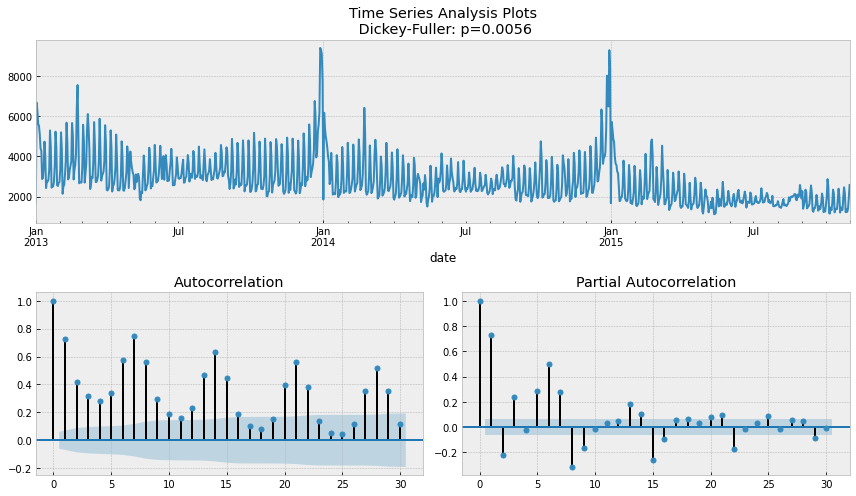

In [10]:
tst.tsplot(y=sales_train2['item_cnt_day'], lags=30)

* With p-value = 0.0056, there are evidences to reject H0, then this time series is statiniry.
* Analysing ACF, we can see a behavior like a sinusoidal function, that indicate seasonality (weekly).

In [11]:
fit1 = pm.auto_arima(y=sales_train2, start_p=1, start_q=1, max_p=8, max_q=8, star_P=0, 
    seasonal=True, stepwise=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=16833.038, BIC=16852.799, Time=2.089 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=16903.691, BIC=16913.571, Time=0.050 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=16900.965, BIC=16915.785, Time=0.420 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=16888.611, BIC=16903.432, Time=0.330 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=16901.692, BIC=16906.633, Time=0.029 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=16542.097, BIC=16566.798, Time=1.668 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=16739.370, BIC=16759.131, Time=0.669 seconds
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=16544.032, BIC=16573.673, Time=2.510 seconds
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=16494.287, BIC=16523.928, Time=3.003 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=16545.742, BIC=16570.443, Time=2.376 seconds
Fit ARIMA(3,1,2)

In [12]:
fit2 = pm.auto_arima(y=sales_train2, start_p=1, start_q=1, max_p=8, max_q=8, star_P=0, 
    seasonal=True, stepwise=False, trace=True, error_action='ignore', suppress_warnings=True)

Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=16903.691, BIC=16913.571, Time=0.074 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=16888.611, BIC=16903.432, Time=0.356 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=16559.991, BIC=16579.752, Time=2.696 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=16542.174, BIC=16566.875, Time=4.704 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=16543.100, BIC=16572.741, Time=5.679 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=16516.157, BIC=16550.738, Time=5.192 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=16900.965, BIC=16915.785, Time=0.488 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=16833.038, BIC=16852.799, Time=0.841 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=16545.742, BIC=16570.443, Time=2.378 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=16543.780, BIC=16573.421, Time=5.610 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=16525.817, 

In [13]:
print(fit1.aic())
print(fit2.aic())

15857.557880376778
16258.108162399858


In [36]:
sales_train_weekly = sales_train.filter(items=['date_block_week','item_cnt_day']).groupby(by=['date_block_week']).sum()

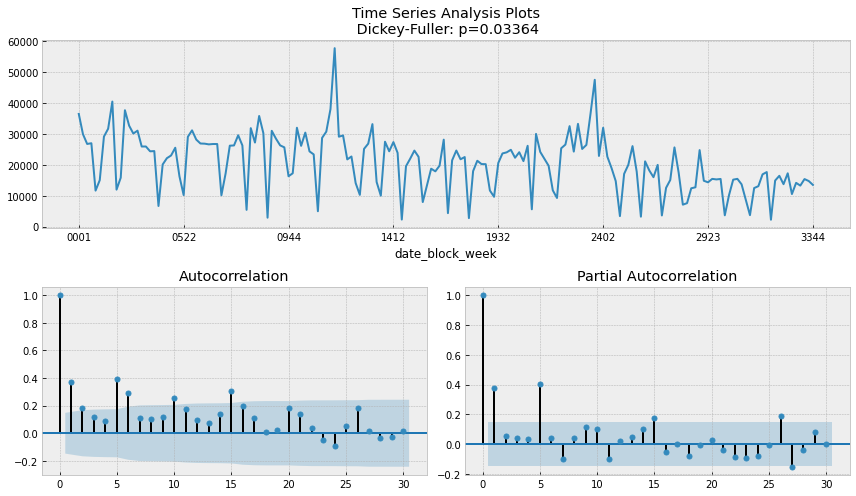

In [37]:
tst.tsplot(y=sales_train_weekly['item_cnt_day'], lags=30)

In [38]:
fit3 = pm.auto_arima(y=sales_train_weekly['item_cnt_day'], start_p=1, start_q=1, max_p=10, max_q=10, 
    stepwise=True, error_action='ignore', suppress_warnings=True, trace=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=3657.762, BIC=3670.421, Time=1.220 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=3730.757, BIC=3737.086, Time=0.026 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=3709.666, BIC=3719.161, Time=0.058 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=3665.204, BIC=3674.698, Time=0.312 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=3728.788, BIC=3731.953, Time=0.015 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=3666.890, BIC=3682.714, Time=0.156 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=3663.300, BIC=3679.124, Time=0.294 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=3659.942, BIC=3672.601, Time=0.455 seconds
Near non-invertible roots for order (0, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.992)
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=3700.196, BIC